# Point Spread Function

This is a point spread function implementation for a `python` novice. No insight will be provided on the psf definition, but some hints on its `python` implementation. Several `python` programming techniques are presented, and a psf implementation is provided.

## Lambda functions

Supppose our goal is to implement a composite function $f(g(h(x)))$ of relatively simple functions. In plain python the solution is something like:

```python
def f(x):
    fx = implementation
    return fx

def g(x):
    gx = implementation
    return gx

def h(x):
    hx = implementation
    return hx

if __name__ == "__main__":

    result = f(g(h(x)))
```

This is a case where lambda functions come handy, saving quite some lines of code:

```python
f = lambda x : implementation

g = lambda x : implementation

h = lambda x : implementation

if __name__ == "__main__":

    result = f(g(h(x)))
```

## Lists and Lambda functions

A standars `list` is a sequence of entries:

In [1]:
L = ["a","b","c"]
for l in L:
    print(l)

a
b
c


naturally we can acces entries of our list using indices:

In [2]:
M = ["e","f","g"]
for i in range(len(M)):
    print(M[i])

e
f
g


indeces start form 0 and range to the length of the list excluded. Consider this list of functions:

In [3]:
S = [lambda x : x,lambda x : x**2,lambda x : x**3]
for f in S:
    print(f(2))

print(S[0](3))
print(S[1](3))
print(S[2](3))

2
4
8
3
9
27


Consider the sintax `S[1](3)` the square brackets `[]` acces to the 0-th elemnt of the list `S`, wich is the function $f(x) = x^2$. The round brackets `()` apply the function $f(3) = 9$. If we now think of `S` as the space of functions:
$$
S = \left\{\,f_0(x) = x,\ f_1(x) = x^2,\ f_2(x) = x^3\,\right\},
$$
well this is a very mathemathically sounding way of coding.

**The more mathematically sounding is the code, the easier to debug it.**

## Dictionaries

Dictionaries can be though as lists, where, instead of associating an integer to the entry, we can associate a generic `key`. In the example below we are associating a string to an integer:

In [4]:
D = {"a":5, "b":7, "h":123}
print(D["h"])

123


In our case we have:
$$
\Omega_{\mathrm{index}} = \left\{ x,y\ |\ f_{\mathrm{index}}(x,y) < \mathrm{condition} \right\}
$$
Here comes the question: we introced dictionaries, as evolution of lists because we thought that `indeces` where not good enought to store data, and now we are back to associating indeces to domains $\Omega$?!?!?! How is that possible?!?!? 

Well here is up to personal taste. Array indeces are **ordered**. In this case I want to spend 0 time in thinking about the correct way to associate formulas to indeces. I want to be free to test the formulas from the paper in the order that better suites my implementation strategy. For example I want to be free to write:
```python
omega = {} # the empty dictionary
omega[4] = lambda x,y : np.sqrt(x**2+y**2)
```
if $\Omega_4$ is the esasiest function to debug.

Secondly, I want my code to be **reusable**. This code section can be easyly reused to adapt to a different notation where domains are indexed using letters instead of numbers. Think of the following example:
$$
\Omega_{a} = \left\{ x,y\ |\ a(x,y) < \mathrm{condition} \right\}
$$
$$
\Omega_{b} = \left\{ x,y\ |\ b(x,y) < \mathrm{condition} \right\}
$$

```python
omega = {} # the empty dictionary
a = lambda x,y : np.sqrt(x**2+y**2)
b = lambda x,y : np.sqrt(x**2-y**2)
omega["a"] = a
omega["b"] = b
```

## Funtion on Different Domains

Cosider the function defined as:
$$
f(x) = 
\left\{
\begin{array}{l}
x^2 & \mathrm{if}\ x < 1 \\
x & \mathrm{if}\ x \ge 1 
\end{array}
\right.
$$
Numpy comes very handy in these cases. 

In [5]:
import numpy as np

In [6]:
x = np.linspace(0,2)
left = x < 1

Here `left` is an array of booleans, `True` where the condition is satisfied, `False` elsewhere. 

In [7]:
fx = np.zeros(x.shape)
fx[left] = x[left]**2

To locate the `right` side of the domain we can eather define the condition where `right` is `True`:
```python
right = x>= 1
```
Or we can locate `right` where `left` is `False`:

In [8]:
right = left == False
fx[right] = x[right]

now we are only left with plotting the result:

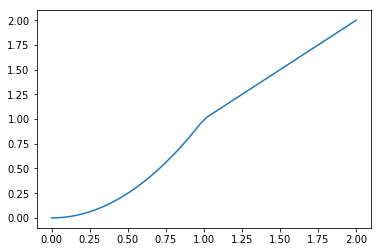

In [10]:
import matplotlib.pyplot as plt
plt.plot(x,fx)
plt.show()